In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Haciendo gráficos y viendo estacionariedad

In [2]:
# Chequenado y guardando el nombre del archivo para leer
if os.path.exists('../../Data/googleStock/Google_Stock_Train (2010-2022).csv'):
    filename = '../../Data/googleStock/Google_Stock_Train (2010-2022).csv'

In [3]:
# leyendo con pandas
import pandas as pd
df = pd.read_csv(filename)  # esta línea abre el archivo, lo lee y crea el dataframe
print(df.dtypes)    # Siempre es importante saber qué tipo de dato es cada columna
df.head() # Mirando las primeras columnas

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,15.689439,15.753504,15.621622,15.684434,15.684434,78169752
1,2010-01-05,15.695195,15.711712,15.554054,15.615365,15.615365,120067812
2,2010-01-06,15.662162,15.662162,15.174174,15.221722,15.221722,158988852
3,2010-01-07,15.250250,15.265265,14.831081,14.867367,14.867367,256315428
4,2010-01-08,14.814815,15.096346,14.742492,15.065566,15.065566,188783028


En la información anterior se puede ver que los timestamps (fechas), son de tipo objeto. Vamos a convertirlos a objetos datetime para poder manejarlos mejor. También vamos a hacer una inspección ocular para ver si existe alguna estacionariedad

In [4]:
df.Date = pd.to_datetime(df.Date) # casting como objetos datetime

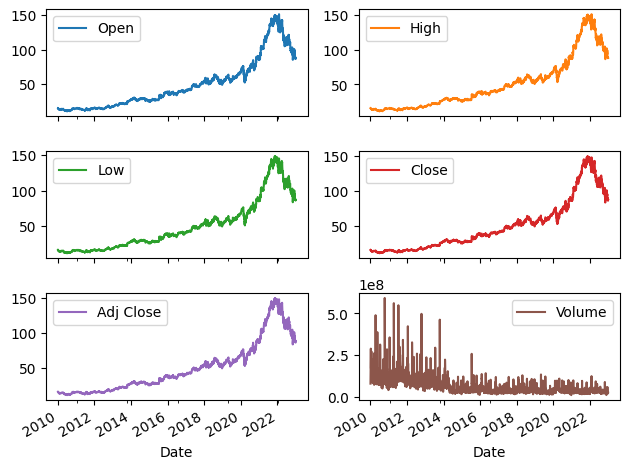

In [5]:
# Pandas tiene wrappers de matplotlib para dibujar rápidamente
df.plot(x = 'Date', subplots=True, layout=(3,2))
plt.tight_layout()
plt.show()

Claramente esta ST no es estacionaria, en ninguna de sus variables. De todos modos cuantifiquemos un poco cómo se mueve la distribución de los datos

# Analizando la distribución cada 60 dias 

Veremos la evolución de las medias y las varianazas, una manera de observar cómo varía la distribución de datos en ventanas temporales

In [6]:
# timedelta nos sirve para operar con intervalos de tiempo
from datetime import timedelta

delta = timedelta(days = 60) # estos 60 días son corridos, no se corresponden con días con datos
d = df.Date.iloc[0]
medias = []
varianzas = []
tstamps = []
while d < df.Date.iloc[-1]:  # while se ejecuta siempre que se cumpla la condición
    mask_1 = df.Date >= d
    mask_2 = df.Date < d + delta
    medias.append(df.loc[mask_1 & mask_2].to_numpy(dtype=np.float64)[:,1:].mean(axis=0)) # & es el operador and bit a bit, sino no funciona
    varianzas.append(df.loc[mask_1 & mask_2].to_numpy(dtype=np.float64)[:,1:].std(axis = 0)) # comprender esta operacion
    tstamps.append(d)
    d += delta
medias = np.array(medias)
varianzas=np.array(varianzas)
tstamps = [d.date() for d in tstamps]

In [7]:
# veamos la estructura de los datos obtenidos en las listas
print(f'N de elementos de medias: {len(medias)} - varianzas {len(varianzas)} - tstamps {len(tstamps)}')

N de elementos de medias: 80 - varianzas 80 - tstamps 80


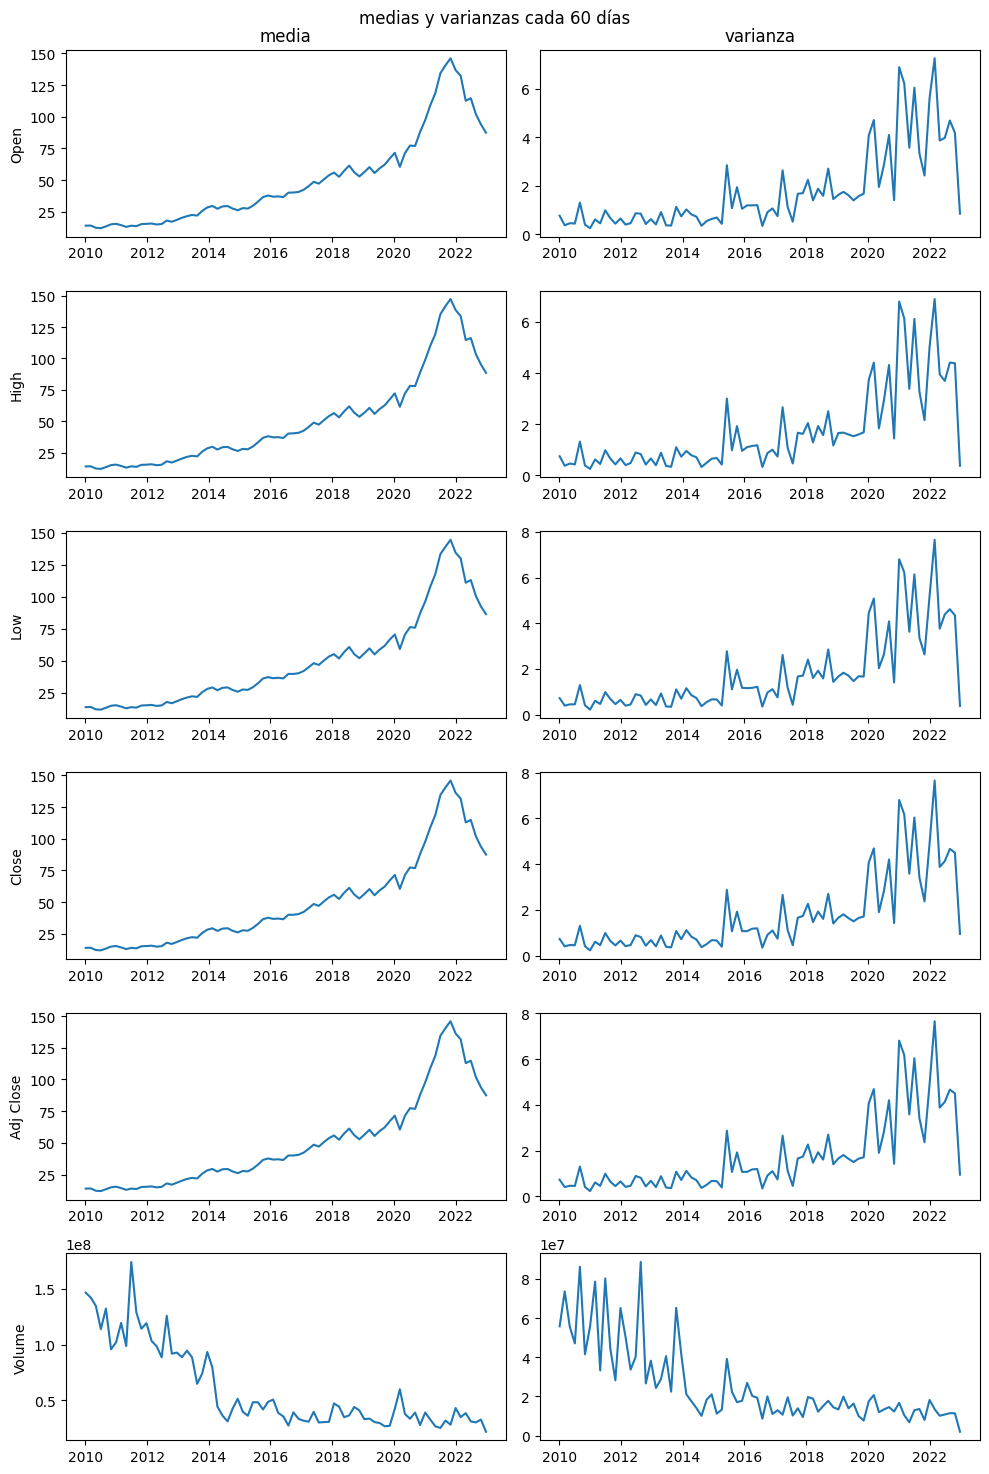

In [8]:
fig, axs = plt.subplots(6,2, figsize = (10,15))
for i in range(medias.shape[1]):
    axs[i,0].plot(tstamps, medias[:,i])
    axs[i,1].plot(tstamps, varianzas[:,i])
    axs[i,0].set_ylabel(list(df.columns)[1:][i]) # Importtante entender esta línea
axs[0,0].set_title('media')
axs[0,1].set_title('varianza')
fig.suptitle('medias y varianzas cada 60 días')
fig.tight_layout()